# Traversial Algorithm analysis

## Data Set (Movie list extracted from json file, this is just a miniature sample data set)

In [147]:
d = {'Beetlejuice': {'Comedy': {}, 'Fantasy': {}},
 'The Cotton Club': {'Crime': {}, 'Drama': {}, 'Music': {}},
 'The Shawshank Redemption': {'Crime': {}, 'Drama': {}},
 'Crocodile Dundee': {'Adventure': {}, 'Comedy': {}, 'Crime': {}},
 'Valkyrie': {'Drama': {}, 'History': {}, 'Thriller': {}}, 'Comedy': {'Beetlejuice': {},
  'Crocodile Dundee': {}},  'Fantasy': {'Beetlejuice': {}},  'Crime': {'The Cotton Club': {},
  'The Shawshank Redemption': {}, 'Crocodile Dundee' : {}}, 'Drama': {'The Cotton Club': {},
  'The Shawshank Redemption': {},
  'Valkyrie': {}}, 'Music': {'The Cotton Club': {}},
 'Adventure': {'Crocodile Dundee': {}}, 'History': {'Valkyrie': {}}, 'Thriller': {'Valkyrie': {}}}

## To convert the dictionary into a graph with nodes and edges:

In [148]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph(d)

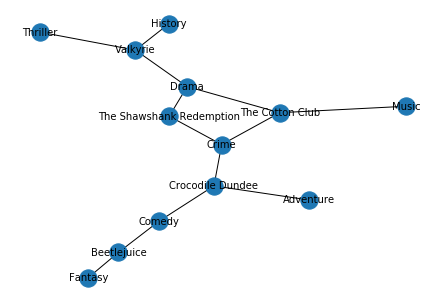

In [149]:
pos = nx.spring_layout(G, seed=500) 
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size = 12)
nx.draw_networkx_labels(G, pos, font_size = 10)
plt.show()

In [165]:
from queue import Queue

def bfs(dictionary, input_node, target_node):
    
    # first step is to initialize the empty queue and visited list
    visited = []
    queue = Queue()
    
    queue.put(input_node)
    visited.append(input_node)
    
    parent = {}
    parent[input_node] = None
    
    pathfound = False
    
    while not queue.empty():
        a = queue.get()
        if a == target_node:
            pathfound = True
            break
    
        for i in dictionary[a]:
            if i not in visited:
                queue.put(i)
                parent[i] = a
                visited.append(i)
    print(visited)  
    # to get the path and represent it as output
    
    path = []
    if pathfound:
        path.append(target_node)
        #print(parent)
        while parent[target_node] is not None:
            path.append(parent[target_node])
            target_node = parent[target_node] 
        path.reverse()
    return path

In [166]:
bfs(G,'Crocodile Dundee','Beetlejuice')

['Crocodile Dundee', 'Adventure', 'Comedy', 'Crime', 'Beetlejuice', 'The Cotton Club', 'The Shawshank Redemption', 'Fantasy', 'Drama', 'Music', 'Valkyrie', 'History', 'Thriller']


[]

# Depth first Search Implementation

In [159]:
visited = set() # Set to keep track of visited nodes of graph.

def dfs(visited, graph, node):  #function for dfs 
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# Driver Code
print("Following is the Depth-First Search")
dfs(visited, G, 'Crocodile Dundee')

Following is the Depth-First Search
Crocodile Dundee
Adventure
Comedy
Beetlejuice
Fantasy
Crime
The Cotton Club
Drama
The Shawshank Redemption
Valkyrie
History
Thriller
Music
